In [94]:
#importing all the packages
import pandas as pd

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', (FutureWarning, ConvergenceWarning))

df = pd.read_csv('listings (1) 2.csv')

# Entire Home / Apartment - Listings for Staten Island


In [79]:
df.head()

,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,Unnamed: 29,neighbourhood_groups_Numbers,Unnamed: 31,neighbourhood_groups
0,2613,8/29/08,"Chicago, IL",1.0,0.97,1,1,t,t,Hyde Park,...,4.99,4.99,4.99,4.96,t,2.21,NaN,4,NaN,South Side
1,17928,5/19/09,"Chicago, IL",1.0,0.96,2,2,t,t,West Town,...,4.56,4.90,4.87,4.88,f,2.86,NaN,3,NaN,West Side
2,33004,8/21/09,"Chicago, IL",1.0,0.99,9,82,t,t,Lincoln Park,...,4.80,4.79,4.77,4.98,t,0.55,NaN,2,NaN,North Side
3,46734,10/18/09,"Chicago, IL",1.0,0.89,1,1,t,t,Lincoln Park,...,5.00,5.00,5.00,5.00,f,0.15,NaN,2,NaN,North Side
4,101521,3/31/10,"Chicago, IL",0.9,0.77,8,12,t,t,Lincoln Park,...,3.93,4.14,3.96,4.89,f,0.27,NaN,2,NaN,North Side


In [80]:
df.isna().any().head(20)

host_id                      False
host_since                   False
host_location                 True
host_response_rate            True
host_acceptance_rate          True
host_listings_count          False
host_total_listings_count    False
host_has_profile_pic         False
host_identity_verified       False
neighbourhood_cleansed       False
Unnamed: 10                   True
room_type                    False
accommodates                 False
bathrooms_text                True
bedrooms                      True
price                        False
minimum_nights               False
maximum_nights               False
has_availability             False
availability_30              False
dtype: bool

In [81]:
#data has lot of NAN values so filling them with 0
df['host_response_rate'] = df['host_response_rate'].fillna(0)
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(0)
df['host_listings_count'] = df['host_listings_count'].fillna(0)
df['accommodates'] = df['accommodates'].fillna(0)
df['bedrooms'] = df['bedrooms'].fillna(0)
df['minimum_nights'] = df['minimum_nights'].fillna(0)
df['maximum_nights'] = df['maximum_nights'].fillna(0)
df['availability_30'] = df['availability_30'].fillna(0)
df['availability_365'] = df['availability_365'].fillna(0)
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(0)
df['review_scores_checkin'] = df['review_scores_checkin'].fillna(0)
df['review_scores_location'] = df['review_scores_location'].fillna(0)
df = df.dropna(subset=['price'])

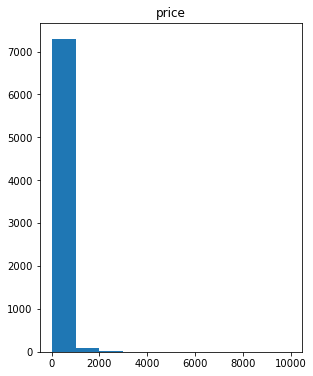

In [82]:
# checking the target for normality
## Continous variables: 
plt.figure(figsize=(20, 15))
#plt.subplots_adjust(hspace=0.5)

Continous = ['price']

for i, feature in enumerate(Continous):
    dist = plt.subplot(3,5,i+1)
    dist.hist(df[feature])
    dist.set_title(feature)
plt.tight_layout()

In [85]:
#log transforming the price as it is not following normal distribution
df.price = np.log(df.price)

df[np.isfinite(df['price'])]

/Users/shreelekhamittinti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,Unnamed: 29,neighbourhood_groups_Numbers,Unnamed: 31,neighbourhood_groups
0,2613,8/29/08,"Chicago, IL",1.00,0.97,1,1,t,t,Hyde Park,...,4.99,4.99,4.99,4.96,t,2.21,NaN,4,NaN,South Side
1,17928,5/19/09,"Chicago, IL",1.00,0.96,2,2,t,t,West Town,...,4.56,4.90,4.87,4.88,f,2.86,NaN,3,NaN,West Side
2,33004,8/21/09,"Chicago, IL",1.00,0.99,9,82,t,t,Lincoln Park,...,4.80,4.79,4.77,4.98,t,0.55,NaN,2,NaN,North Side
3,46734,10/18/09,"Chicago, IL",1.00,0.89,1,1,t,t,Lincoln Park,...,5.00,5.00,5.00,5.00,f,0.15,NaN,2,NaN,North Side
4,101521,3/31/10,"Chicago, IL",0.90,0.77,8,12,t,t,Lincoln Park,...,3.93,4.14,3.96,4.89,f,0.27,NaN,2,NaN,North Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,22094147,10/3/14,"Oak Park, IL",0.99,0.98,169,183,t,t,Austin,...,3.50,4.00,4.33,4.67,f,0.38,NaN,3,NaN,West Side
7410,30147879,3/28/15,"River Forest, IL",0.00,1.00,1,1,t,t,Austin,...,5.00,5.00,5.00,4.75,f,0.12,NaN,3,NaN,West Side
7411,447662042,3/3/22,NaN,1.00,1.00,7,7,t,t,Austin,...,4.75,5.00,5.00,5.00,f,2.50,NaN,3,NaN,West Side
7412,124980082,4/9/17,"Pennsylvania, United States",0.00,0.67,1,1,t,t,Ohare,...,4.80,5.00,5.00,5.00,f,0.46,NaN,2,NaN,North side


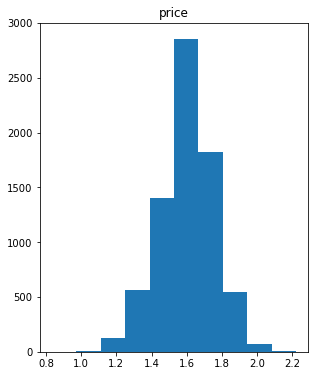

In [86]:
# checking the target for normality after log transformation
## Continous variables: 
plt.figure(figsize=(20, 15))
#plt.subplots_adjust(hspace=0.5)

Continous = ['price']

for i, feature in enumerate(Continous):
    dist = plt.subplot(3,5,i+1)
    dist.hist(df[feature])
    dist.set_title(feature)
plt.tight_layout()

In [105]:
df['price'].isna().sum()

0

Text(0.5, 1.0, 'Price against Number of Reviews')

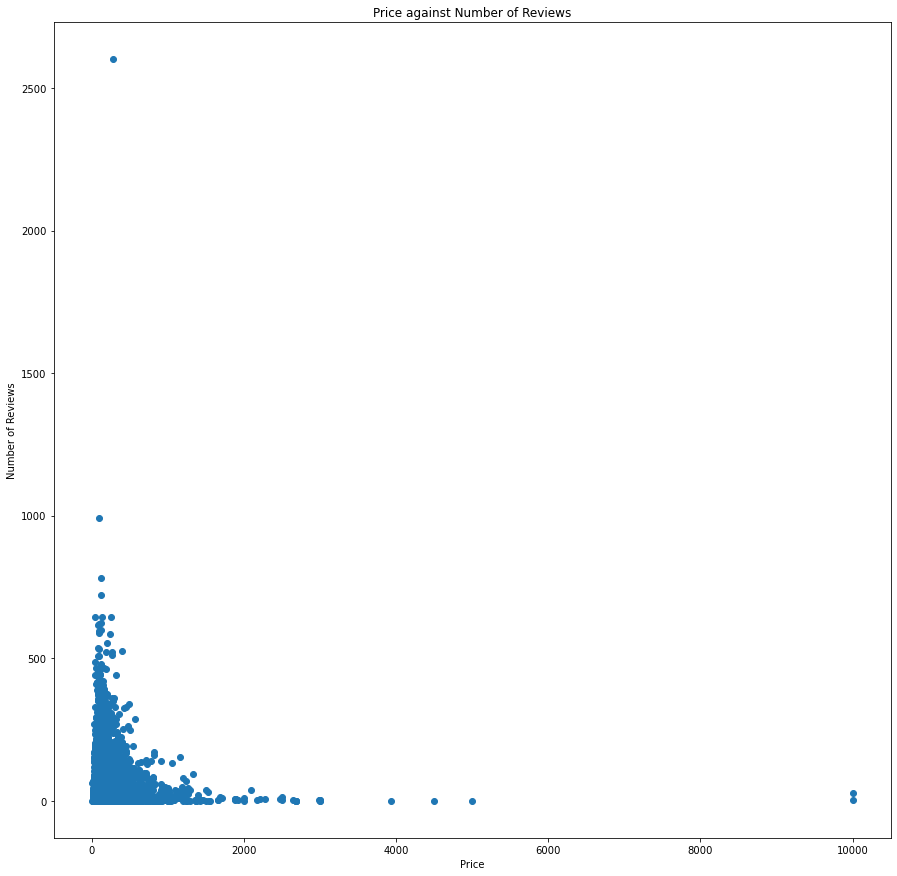

In [106]:
plt.figure(figsize=(15,15))
plt.scatter(df.loc[:, "price"], df.loc[:, "number_of_reviews"])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price against Number of Reviews')

In [107]:
# df_C = pd.DataFrame(df.loc["Central", ["price","number_of_reviews"]])
# df_N = pd.DataFrame(df.loc["North side", ["price","number_of_reviews"]])
# df_S = pd.DataFrame(df.loc["South side", ["price","number_of_reviews"]])
# df_W = pd.DataFrame(df.loc["West side", ["price","number_of_reviews"]])


In [108]:
df_C = df[df['neighbourhood_groups']=='Central'][["price","number_of_reviews"]]
df_N = df[df['neighbourhood_groups']=='North side'][["price","number_of_reviews"]]
df_S = df[df['neighbourhood_groups']=='South side'][["price","number_of_reviews"]]
df_W = df[df['neighbourhood_groups']=='West side'][["price","number_of_reviews"]]



In [109]:
df_C.dropna(0)

,price,number_of_reviews
8,89,102
18,170,39
30,119,38
47,75,156
67,96,35
...,...,...
7036,242,0
7039,71,0
7053,150,0
7054,2000,0


In [110]:
df_C.isna().sum()

price                0
number_of_reviews    0
dtype: int64

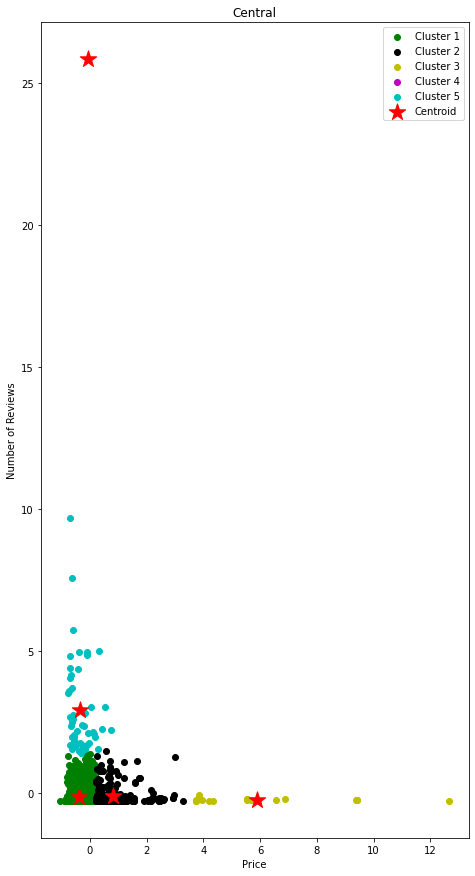

In [138]:
X_std_C = StandardScaler().fit_transform(df_C)

km_C = KMeans(n_clusters=5, max_iter=100)
km_C.fit(X_std_C)
centroids_C = km_C.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_C[km_C.labels_ == 0, 0], X_std_C[km_C.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_C[km_C.labels_ == 1, 0], X_std_C[km_C.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_C[km_C.labels_ == 2, 0], X_std_C[km_C.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_C[km_C.labels_ == 3, 0], X_std_C[km_C.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_C[km_C.labels_ == 4, 0], X_std_C[km_C.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_C[:, 0], centroids_C[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Central')
ax.set_aspect('equal')

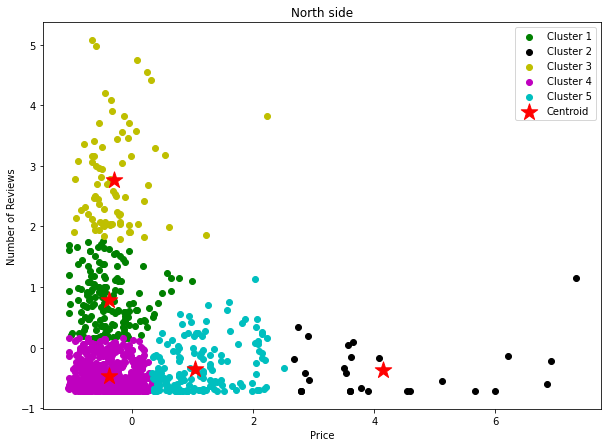

In [139]:
X_std_N = StandardScaler().fit_transform(df_N)

km_N = KMeans(n_clusters=5, max_iter=100)
km_N.fit(X_std_N)
centroids_N = km_N.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 15))
plt.scatter(X_std_N[km_N.labels_ == 0, 0], X_std_N[km_N.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_N[km_N.labels_ == 1, 0], X_std_N[km_N.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_N[km_N.labels_ == 2, 0], X_std_N[km_N.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_N[km_N.labels_ == 3, 0], X_std_N[km_N.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_N[km_N.labels_ == 4, 0], X_std_N[km_N.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_N[:, 0], centroids_N[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('North side')
ax.set_aspect('equal')

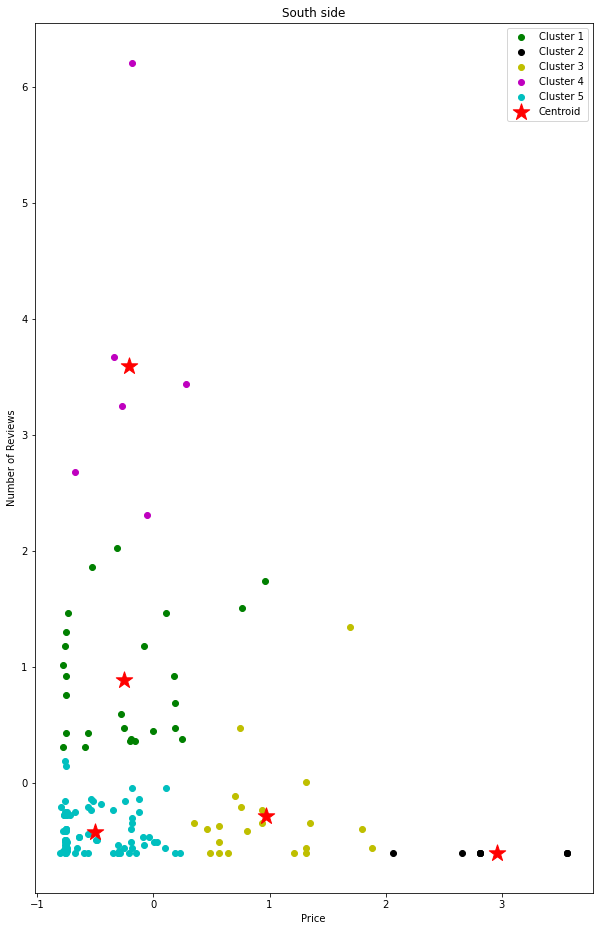

In [129]:
X_std_S = StandardScaler().fit_transform(df_S)

km_S = KMeans(n_clusters=5, max_iter=100)
km_S.fit(X_std_S)
centroids_S = km_S.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 25))
plt.scatter(X_std_S[km_S.labels_ == 0, 0], X_std_S[km_S.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_S[km_S.labels_ == 1, 0], X_std_S[km_S.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_S[km_S.labels_ == 2, 0], X_std_S[km_S.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_S[km_S.labels_ == 3, 0], X_std_S[km_S.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_S[km_S.labels_ == 4, 0], X_std_S[km_S.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_S[:, 0], centroids_S[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('South side')
ax.set_aspect('equal')

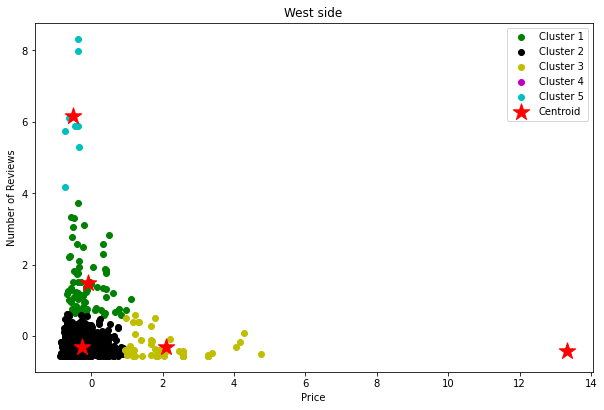

In [131]:
X_std_W = StandardScaler().fit_transform(df_W)

km_W = KMeans(n_clusters=5, max_iter=100)
km_W.fit(X_std_W)
centroids_W = km_W.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 25))
plt.scatter(X_std_W[km_W.labels_ == 0, 0], X_std_W[km_W.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_W[km_W.labels_ == 1, 0], X_std_W[km_W.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_W[km_W.labels_ == 2, 0], X_std_W[km_W.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_W[km_W.labels_ == 3, 0], X_std_W[km_W.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_W[km_W.labels_ == 4, 0], X_std_W[km_W.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_W[:, 0], centroids_W[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('West side')
ax.set_aspect('equal')